In [1]:
import pandas as pd

#display all columns when printing dataframe
pd.set_option("display.max_columns", None)


In [9]:
#Load dataset
true_df = pd.read_csv("../data/True.csv")
fake_df = pd.read_csv("../data/Fake.csv")

print("True News Shape:", true_df.shape)
print("Fake News Shape:", fake_df.shape)


True News Shape: (21417, 4)
Fake News Shape: (23481, 4)


In [11]:
true_df["label"] =1   # 1 = real 
fake_df["label"] =0   # 0 = fake

In [12]:
#combine into one dataset
news_df = pd.concat([true_df, fake_df], axis =0)
news_df = news_df.sample(frac=1).reset_index(drop=True)  #shuffle
news_df.head()

,title,text,subject,date,label
0,Boiler Room #93 – The Outgoing Head of Hydra,Tune in to the Alternate Current Radio Network...,US_News,"January 19, 2017",0
1,Britain's May heads to Middle East,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"November 28, 2017",1
2,FAMILY OF S.C. SHOOTING VICTIM HAS A MESSAGE F...,"Poor little Al if he s not race baiting, he s ...",politics,"Apr 9, 2015",0
3,Venezuelan crisis spawns boom in gambling,"CARACAS (Reuters) - The Whale , The Dog or ...",worldnews,"November 7, 2017",1
4,N KOREA JUST REVEALED Plans To Unleash An Unim...,WFB North Korea for the first time this week ...,left-news,"Sep 6, 2017",0


In [13]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
news_df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
news_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [16]:
print("Real News Example:\n", news_df[news_df["label"]==1]["title"].iloc[0])
print("\nFake News Example:\n", news_df[news_df["label"]==0]["title"].iloc[0])


Real News Example:
 Britain's May heads to Middle East

Fake News Example:
 Boiler Room #93 – The Outgoing Head of Hydra


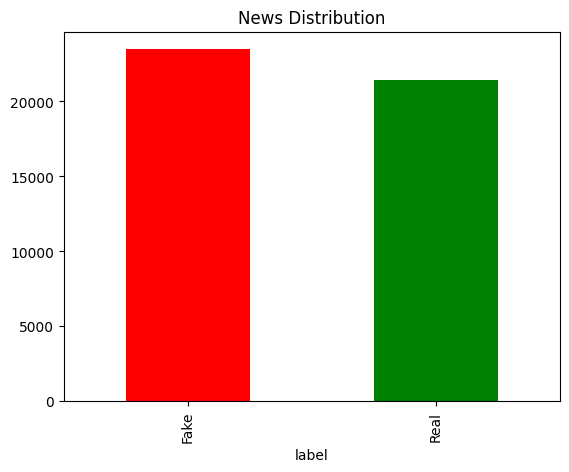

In [19]:
import matplotlib.pyplot as plt

news_df["label"].value_counts().plot(kind="bar", color=["red","green"])
plt.xticks([0,1], ["Fake", "Real"])
plt.title("News Distribution")
plt.show()

In [21]:
#save datset
news_df.to_csv("../data/combined_news.csv", index=False)